# Project 1

### Subtractive Error Exploration in: 
### Quadratic Equation, Harmonic Series, Maclaurin series, Bessel Functions

#### Written by Owen Morehead - 3/17/2020

In [1]:
# import relevant modules

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
print(sys.version)
import warnings

3.7.6 (default, Jan  8 2020, 19:59:22) 
[GCC 7.3.0]


----------------------
## Subtractive Error Exploration

The solution to the quadratic equation provides a clear example of subtractive errors. For $$ax^2+bx+c=0$$ the solutions are given by $$x_\pm=\frac{-b\pm\sqrt{b^2-4ac}}{2a}$$ or, equivalently, $$x_\pm^\prime=\frac{-2c}{b\pm\sqrt{b^2-4ac}}.$$

Interestingly, problems of finite machine precision arise when $b>>4ac$. We write a function that calculates the two solutions both ways (so, 4 results) for any $(a,b,c)$. Then we use it to explore the following:
  * we follow the suggestion in the textbook by setting $a=b=1$ and $c=10^{-n}$ for $n=1, 2, 3,...$. We plot the log of the error as a fuction of $n$ for $n=1...13$. 
  * we repeat for a smaller value of $a$, say $10^{-3}$.
  * we can make a 2D contour plot of the log of the error. 

In [39]:
def find_roots(a, b, c, method=1):
    """Computes the roots of a quadratic equation.
    
    A proper docstring. 
    
    This example is needlessly formulaic, but it serves as an demonstration.
    I will abbreviate subsequent docstrings if the function's use is clear from context.
    
    Parameters
    ----------
    a: float
        Coefficient of x^2.
    b: float
        Coefficient of x^1.
    c: float
        Coefficient of x^0 (constant term).
    method: int, optional
        If method is `1`, then the roots are computed via:
            roots = (-b +- sqrt(b^2 - 4ac)) / (2a)
        If method is `2`, then roots are computed using:
            roots =  -2c / (b +- sqrt(b^2 - 4ac))
            
    Returns
    -------
    roots: tuple
        The roots of the quadratic equation:
            ax^2 + bx + c = 0
            
    Examples
    --------
    # Compute the roots of x^2 + x + 0.5 using
    # first method:
    a, b, c = 1.0, 1.0, 0.5
    roots1 = find_roots(a, b, c, method=1)
    # same, but with method 2:
    roots2 = find_roots(a, b, c, method=2)
    
    """
    # Compute the descriminant
    descrim = b**2 - 4.0 * a * c
    sqrt_descrim = np.sqrt(descrim)
    
    if method == 1:
        xplus = (-b + sqrt_descrim) / (2.0 * a)
        xminus = (-b - sqrt_descrim) / (2.0 * a)
    elif method == 2:
        xplus = -2.0 * c / (b + sqrt_descrim)
        xminus = -2.0 * c / (b - sqrt_descrim)
    else:
        raise ValueError("Invalid method = {}. Use method=1 or 2.".format(method))
    return xplus, xminus

In [40]:
def residual(a, b, c, x):
    """Compute the residual of an estimated root to a quadratic equation.
    """
    # Our calculation is only so accurate, so make sure we round up
    # errors to 1e-20 if necessary:
    absres = np.abs(a*x*x + b*x + c)
    # we use np.where instead of `max` so that we can pass NumPy
    # arrays into this function. Note, this is equivalent to 
    # something like: max(absres, 1e-20)
    return np.where(absres < 1e-20, 1e-20, absres)

In [41]:
# Values of n for which we will compute roots
ns = np.arange(1,14)

# set parameters
a = 1.0
b = 1.0
cs = 10.0**-ns

# Compute roots use method 1 and method 2 with c=10^-n
# Since we've used NumPy everywhere, we can just pass
# the arrays directly into `find_roots`. 
roots1 = find_roots(a, b, cs, method=1)
roots2 = find_roots(a, b, cs, method=2)

# Compute residuals
residuals_xp = residual(a, b, cs, roots1[0]) 
residuals_xm = residual(a, b, cs, roots1[1]) 

residuals_xpp = residual(a, b, cs, roots2[0])
residuals_xmp = residual(a, b, cs, roots2[1]) 

We should note that there a few alternative ways to compute all the roots:

1) For loop (c-like programming):
```python
roots1 = np.zeros_like(cs)
roots2 = np.zeros_like(cs)
for i, c in enumerate(cs):
    roots1[i] = find_roots(a, b, c, method=1)
    roots2[i] = find_roots(a, b, c, method=2)
```
2) List comprehension (Pythonic-way):
```python
roots1 = [find_roots(a, b, c, method=1) for c in cs]
roots2 = [find_roots(a, b, c, method=2) for c in cs]
```
3) NumPy
```python
# Only works if your function is NumPy compatable.
# For example, we must use np.sqrt and not Python's
# built-in sqrt.
roots1 = find_roots(a, b, cs, method=1)
roots2 = find_roots(a, b, cs, method=2)
# If our function wasn't compatible with Numpy, we could
# make compatible by using np.vectorized. For example,
# we can make the built in sqrt function compatible with
# arrays by doing to following:
from math import sqrt
sqrt_vec = np.vectorize(sqrt)
xs = np.linspace(0, 10, num=20)
sqrt_vec(xs)
```

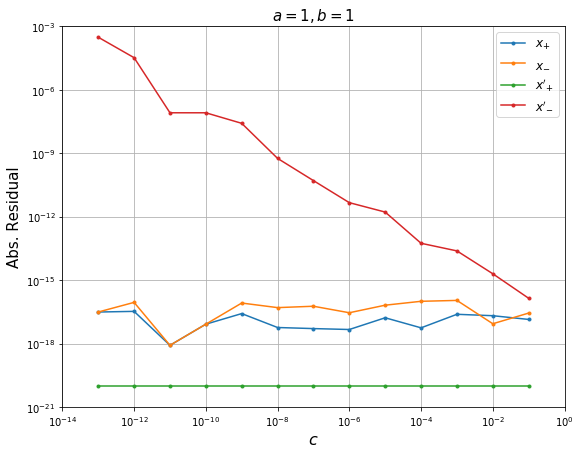

In [42]:
plt.figure(figsize=(9,7))
plt.plot(10.**-ns, residuals_xp, label=r"$x_{+}$", marker='.')
plt.plot(10.**-ns, residuals_xm, label=r"$x_{-}$", marker='.')

plt.plot(10.**-ns, residuals_xpp, label=r"$x'_{+}$", marker='.')
plt.plot(10.**-ns, residuals_xmp, label=r"$x'_{-}$", marker='.')

plt.xlim([10.**-14,10.**0])
plt.ylim([1e-21,1e-3])
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'Abs. Residual', fontsize=15)
plt.xlabel(r'$c$', fontsize=16)
plt.legend(fontsize=12)
plt.title(r'$a = 1, b=1$', fontsize=15)
plt.grid()

Analytically, both $x_-$ and $x_-^\prime$ satisfy the quadratic. But in our numerical implementation, $x_-^\prime$ is a much worse performer at small $c$.

Now weset $a=10^{-3}$ and repeat the calculation:

In [43]:
# Values of n for which we will compute roots
ns = np.arange(1,14)

# set parameters
a = 1e-3
b = 1.0
cs = 10.0**-ns

# Compute roots use method 1 and method 2 with c=10^-n
roots1 = find_roots(a, b, cs, method=1)
roots2 = find_roots(a, b, cs, method=2)

# Compute residuals
residuals_xp = residual(a,b,cs,roots1[0]) 
residuals_xm = residual(a,b,cs,roots1[1]) 

residuals_xpp = residual(a,b,cs,roots2[0])
residuals_xmp = residual(a,b,cs,roots2[1]) 

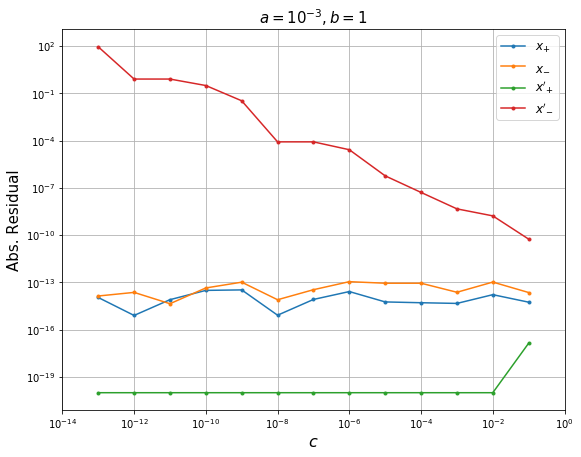

In [44]:
plt.figure(figsize=(9,7))
plt.plot(10.**-ns, residuals_xp, label=r"$x_{+}$", marker='.')
plt.plot(10.**-ns, residuals_xm, label=r"$x_{-}$", marker='.')

plt.plot(10.**-ns, residuals_xpp, label=r"$x'_{+}$", marker='.')
plt.plot(10.**-ns, residuals_xmp, label=r"$x'_{-}$", marker='.')

plt.xlim([10.**-14,10.**0])
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'Abs. Residual', fontsize=15)
plt.xlabel(r'$c$', fontsize=16)
plt.legend(fontsize=12)
plt.title(r'$a = 10^{-3}, b=1$', fontsize=15)
plt.grid()

Since $4ac$ is yet smaller than it was before, but $b^2$ is the same, the numerical precision errors are of even greater consequence. Thus, the error is substantially greater than in the previous case.

Now making a contour plot of the log of the error:

In [45]:
# Generate logarithmically spaced a values from 10^-3 to 1.0
a_vals = np.logspace(-3, 0, num=50)
b = 1.0
# Generate logarithmically spaced c values from 10^-13 to 0.1
c_vals = np.logspace(-13, -1, num=50)
# Create meshed grids from the a and c arrays
AS, CS = np.meshgrid(a_vals, c_vals)

# Compute the roots using method 1 and method 2
# Again, since our function `find_roots` is NumPy 
# compatible, we can just pass in the meshed grids.
# If it wasn't we could make it compatible by using:
# find_roots_vec = np.vectorize(find_roots)
ROOTS1 = find_roots(AS, b, CS, method=1)
ROOTS2 = find_roots(AS, b, CS, method=2)

# Extract the roots for + and - solutions
XPS = ROOTS1[0]
XMS = ROOTS1[1]
XPPS = ROOTS2[0]
XMPS = ROOTS2[1]

# Compute the absolute residuals of all the roots
RES_XPS = residual(AS, b, CS, XPS)
RES_XMS = residual(AS, b, CS, XMS)
RES_XPPS = residual(AS, b, CS, XPPS)
RES_XMPS = residual(AS, b, CS, XMPS)

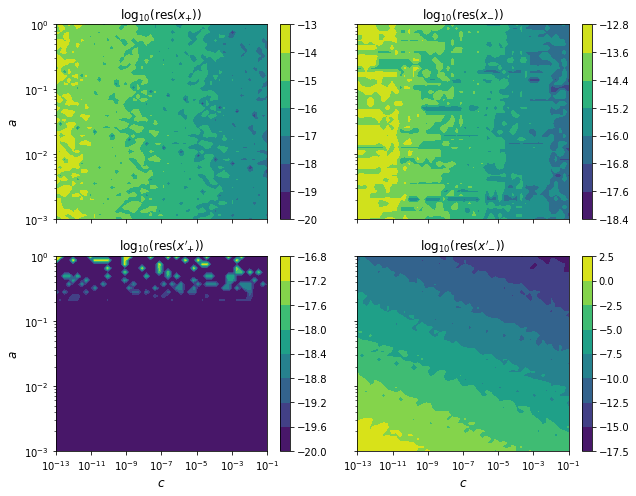

In [46]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharex=True,sharey=True,figsize=(9,7))

# Plot lines of constant contours
c1 = ax1.contourf(CS, AS, np.log10(RES_XPS).T)
c2 = ax2.contourf(CS, AS, np.log10(RES_XMS).T)
c3 = ax3.contourf(CS, AS, np.log10(RES_XPPS).T)
c4 = ax4.contourf(CS, AS, np.log10(RES_XMPS).T)

# Add color bars so we know what the colors mean
fig.colorbar(c1, ax=ax1)
fig.colorbar(c2, ax=ax2)
fig.colorbar(c3, ax=ax3)
fig.colorbar(c4, ax=ax4)

# Add titles to each subplot
ax1.set_title(r"$\log_{10}(\mathrm{res}(x_{+}))$")
ax2.set_title(r"$\log_{10}(\mathrm{res}(x_{-}))$")
ax3.set_title(r"$\log_{10}(\mathrm{res}(x'_{+}))$")
ax4.set_title(r"$\log_{10}(\mathrm{res}(x'_{-}))$")
# Make axes log-log
ax1.set_yscale('log')
ax1.set_xscale('log')
# Add y labels to left plots
ax1.set_ylabel(r'$a$',fontsize=12)
ax3.set_ylabel(r'$a$',fontsize=12)
# Add x labels to lower plots
ax3.set_xlabel(r'$c$',fontsize=12)
ax4.set_xlabel(r'$c$',fontsize=12)

fig.tight_layout()

-------------
## Numerical Series Sum

Calculating the sum of a simple series must be done carefully. For exampl, we can look at:

$$S^\text{(up)} = \sum_{n=1}^{N} \frac{1}{n}$$

which is clearly finite for finite $N$. 

Of course, analytically the result is the same whether you sum the series upwards from $n = 1$ or downwards from $n = N$, *i.e.*,
$$
S^\text{(down)} = \sum_{n=N}^{1} \frac{1}{n}
$$

Surprisingly, numerically calculating this with finite precision, we find that $S^\text{(up)} \neq S^\text{(down)}$.

We first write a function that calculates $S^\text{(up)}$ and $S^\text{(down)}$ in single (32-bit) precision as a function of $N$:



In [47]:
def sum_harmonic_to(N, updown='up', usetype='float32'):
    """
    Computes the partial sum of the harmonic series.
    """
    
    # Determine the arguments for 'range(low, high, inc)'
    # summing up:   we start at 1, end at N
    # summing down: we start at N, end at 1
    if updown == 'up':
        low, high, inc = (1, N + 1, 1)
    elif updown == 'down':
        low, high, inc = (N, 0, -1)
    else:
        raise ValueError('Invalid updown: {}. Use "up" or "down".'.format(updown))
        
    # Determine casting type
    # i.e, usetype=='float32': caster(x) == np.float32(x)
    #      usetype=='float64': caster(x) == np.float64(x)
    if usetype == 'float32':
        caster = np.float32
    elif usetype == 'float64':
        caster = np.float64
    else:
        raise ValueError('Invalid type: {}. Use "float32" or "float64".'.format(usetype))

    # perform the sum using a generator expression 
    # Generate values: (1/1, 1/2, 1/3, ..., 1/N) or (1/N, ..., 1/3, 1/2, 1/1) 
    # same results are obtained use list comprehension: 
    #   [caster(1.0) / caster(n) for n in range(low, high, inc)]
    generator = (caster(1.0) / caster(n) for n in range(low, high, inc))
    start_val = caster(0.0)
    # Perform the sum and return the value
    return sum(generator, start_val)

One advantage of a generator is that it doesn't actually compute anything until we try to access the value. This is typically more memory efficient, since we don't need to compute all the values at once. We just compute them as needed.

Now we calculate the two sums for $N = 10^n$, with $n = 2, 3,...,7$. Then we make a log-log plot of 

$$(S^\text{(up)}-S^\text{(down)})/(|(S^\text{(up)}|+|(S^\text{(down)}|) \:\:\:\text{vs.}\:\: N.$$

In [48]:
ns = np.arange(2,8)
# Compute the sums by summing from up starting at 1
sumups32 = np.array([sum_harmonic_to(N=10**n, updown='up', usetype='float32') for n in ns], dtype=np.float32)
# Compute the sums by summing down up starting at N
sumdowns32 = np.array([sum_harmonic_to(N=10**n, updown='down', usetype='float32') for n in ns], dtype=np.float32)
# Compute the differences
diffs32 = np.abs(sumups32 - sumdowns32) / (np.abs(sumups32) + np.abs(sumdowns32))

For N = 10^2:
	32-bit S^{up} =   5.1873779296875000
	32-bit S^{down} = 5.1873769760131836
For N = 10^3:
	32-bit S^{up} =   7.4854784011840820
	32-bit S^{down} = 7.4854717254638672
For N = 10^4:
	32-bit S^{up} =   9.7876129150390625
	32-bit S^{down} = 9.7876043319702148
For N = 10^5:
	32-bit S^{up} =   12.0908508300781250
	32-bit S^{down} = 12.0901527404785156
For N = 10^6:
	32-bit S^{up} =   14.3573579788208008
	32-bit S^{down} = 14.3926515579223633
For N = 10^7:
	32-bit S^{up} =   15.4036827087402344
	32-bit S^{down} = 16.6860313415527344


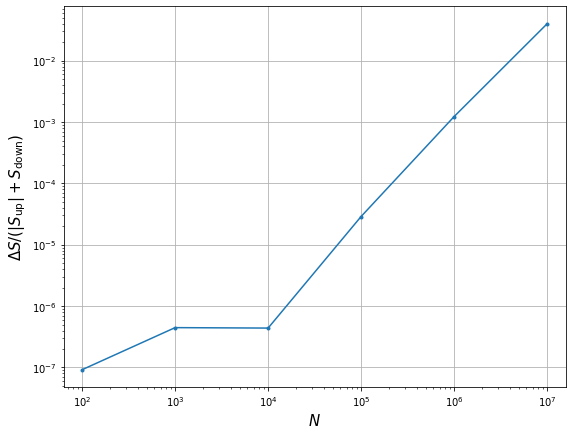

In [49]:
plt.figure(figsize=(9,7))
Nvals=10.**ns
plt.plot(Nvals, diffs32, marker='.')
plt.xlim([10.**1.8,10.**7.2])
plt.xlabel(r'$N$', fontsize=15)
plt.yscale('log')
plt.xscale('log')

for i, N in enumerate(Nvals):
    # `N` goes through our N values, and `i` counts how many times the loop has run
    print("For N = 10^%d:" % np.log10(N))
    print("\t32-bit S^{up} =   %.16f" % sumups32[i])
    print("\t32-bit S^{down} = %.16f" % sumdowns32[i])

plt.ylabel(r'$\Delta S / (|S_{\mathrm{up}}| + S_{\mathrm{down}})$', fontsize=15)
plt.grid()

The down-sum is indeed the better performer. This is due to the fact that adding two very different values causes a loss of precision, just as subtracting very similar values does. This is because the two numbers have to be "aligned" for addition, meaning that the exponent of the smaller number needs to be made larger to match the exponent of the larger number.

When we sum _up_, the running value quickly gets large, but the subsequent terms ($1/n$) are getting smaller and smaller. This means that as we go on, our relative error gets worse and worse, and this compounds through many additions. On the other hand, when we sum _down_, the subsequent terms are getting larger and larger, at a rate similar to the rate of increase of the running value. Thus, the difference in exponents is smaller each time.

Notice that generally the relative error increases with $N$ at least as a power law (i.e., straight line on a log-log plot). This is what we expect from error compounding, which is exponential in principle. If you can only evaluate each addition with precision $p$, then the precision of the $N$th partial sum is $p^N$. However this case is slightly more complicated, because $p$ degrades as the value of the partial sum increases.

Next we calculate $S^\text{(up)}$ and $S^\text{(down)}$ in double precision, and show that in double precision they agree much better.

In [50]:
ns = np.arange(2,8)
sumups64 = np.array([sum_harmonic_to(N=10**n, updown='up', usetype='float64') for n in ns])
sumdowns64 = np.array([sum_harmonic_to(N=10**n, updown='down', usetype='float64') for n in ns])

In [51]:
diffs64 = np.abs(sumups64 - sumdowns64) / (np.abs(sumups64) + np.abs(sumdowns64))

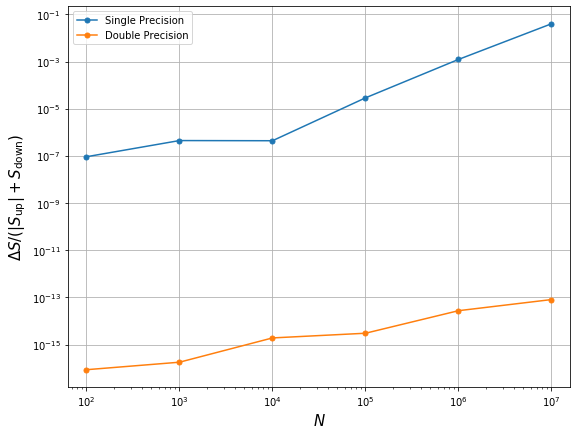

In [52]:
Nvals=10.**ns
plt.figure(figsize=(9,7))
plt.plot(Nvals, diffs32,label='Single Precision', marker='.', ms=10)
plt.plot(Nvals, diffs64,label='Double Precision', marker='.', ms=10)
plt.xlim([10.**1.8,10.**7.2])
plt.xlabel(r'$N$', fontsize=15)
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\Delta S / (|S_{\mathrm{up}}| + S_{\mathrm{down}})$', fontsize=15)
plt.grid()
dd=plt.legend()

We see that the error has been reduced by many orders of magnitude.

In [53]:
true_sums = np.array([5.1873775176396202608,7.4854708605503449127,9.7876060360443822642,12.090146129863427947,14.392726722865723631,16.695311365859851815])

error_up_32 = np.abs(true_sums - sumups32) / true_sums
error_down_32 = np.abs(true_sums - sumdowns32) / true_sums
error_up_64 = np.abs(true_sums - sumups64) / true_sums
error_down_64 = np.abs(true_sums - sumdowns64) / true_sums

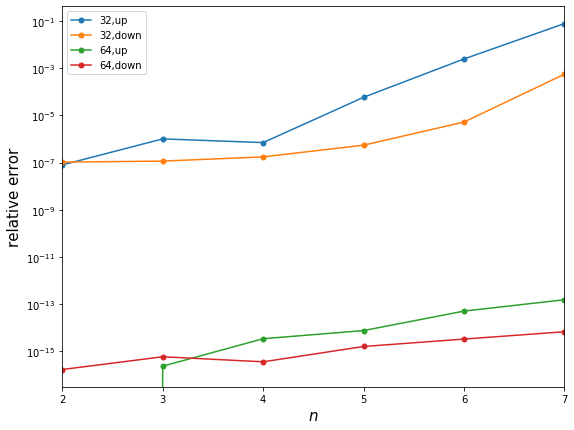

In [54]:
plt.figure(figsize=(9,7))
plt.plot(ns, error_up_32,label='32,up', marker='.', ms=10)
plt.plot(ns, error_down_32,label='32,down', marker='.', ms=10)
plt.plot(ns, error_up_64,label='64,up', marker='.', ms=10)
plt.plot(ns, error_down_64,label='64,down', marker='.', ms=10)

plt.xlim([2,7])
plt.xlabel(r'$n$', fontsize=15)
plt.yscale('log')
plt.ylabel(r'relative error', fontsize=15)
dd=plt.legend()

-------------------
##Exploring Behavior of Maclaurin Series

Recall the Maclaurin series for $\sin(x)$:

$$\sin(x)=x-\frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} ... = \sum_{n=1}^\infty\frac{(-1)^{n-1} x^{2n-1}}{(2n-1)!}$$

First, we must make an approximation by summing the first $N$ terms. 
However that algorithm is worrisome because 
   - factorials are computationally expensive and are very large for large $N$. For large $x$ we must make $N$ large.
   - dividing two large numbers should be avoided whenever possible.
   
To exploit these problems, we can do the wrong thing and see the consequences. We write a function that returns the nth term for some $x$ using the formula above.

In [55]:
def compute_nth_term_sin_series(x, n):
    """Compute the nth term in the taylor series for sin(x)
    centered around x=0.
    """
    return (-1.0)**(n - 1) * x**(2.0 * n - 1.0) / np.math.factorial(2 * n - 1)

In [56]:
ns = np.arange(1, 86)
xs = np.array([1.0, 10.0, 50.0])
sin_series = np.array([[compute_nth_term_sin_series(x, n) for n in ns] for x in xs])

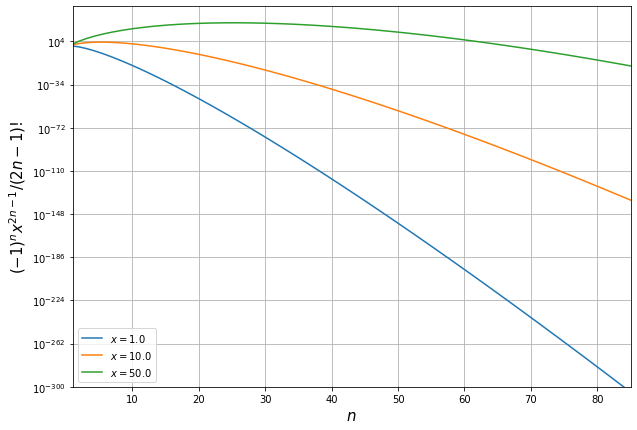

In [57]:
plt.figure(figsize=(10,7))
for x, series in zip(xs, sin_series):
    plt.plot(ns, np.abs(series), label=r'$x = {}$'.format(x))
    
plt.yscale('log')
plt.xlim([np.min(ns),np.max(ns)])
plt.ylim(10.**-300,10.**35)
plt.xlabel(r'$n$',fontsize=15)
plt.ylabel(r'$(-1)^nx^{2n-1}/(2n-1)!$',fontsize=15)
plt.legend()
plt.grid()

There is a large range of error here. This plot looks reasonable out to $N=85$ or so.

We can do much better by computing the first $n$ terms in the series by. reusing the last term. We make a similar plot, showing this is more robust.

In [58]:
def compute_sin_series(x, nmax):
    """
    Compute the first `nmax` terms in the series of sin(x).
    """      
    series = np.zeros(nmax, dtype=np.float64)
    # Store first value:
    series[0] = x
    # Generate the remaining terms:
    for i in range(1, nmax):
        n = i + 1
        series[i] = series[i-1] * -x**2 / ((2*n-1) * (2*n-2))
    return series

In [59]:
ns = np.arange(1, 1001)
xs = np.array([1., 10., 50., 100., 300., 700.])

sin_series = np.array([compute_sin_series(x, len(ns)) for x in xs])

/usr/local/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:6759: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/ticker.py:2352: RuntimeWarning: overflow encountered in power
  ticklocs = b ** decades
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/ticker.py:2200: RuntimeWarning: invalid value encountered in double_scalars
  return abs(x - np.round(x)) < 1e-10
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/ticker.py:1123: RuntimeWarning: invalid value encountered in double_scalars
  coeff = np.round(x / b ** exponent)


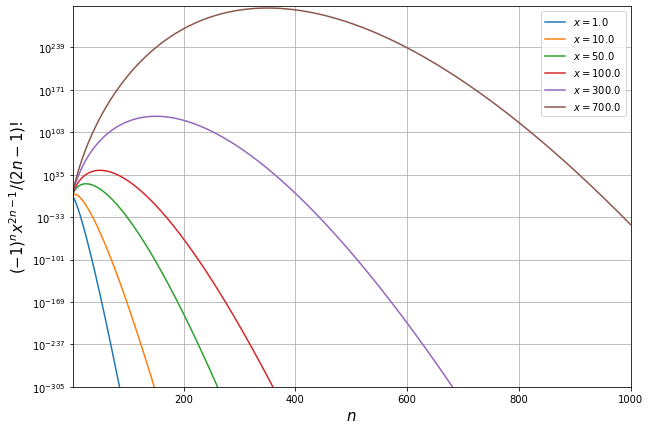

In [60]:
plt.figure(figsize=(10,7))
for x, series in zip(xs, sin_series):
    plt.plot(ns, np.abs(series), label=r'$x = {}$'.format(x))
    
plt.yscale('log')
plt.xlim([np.min(ns),np.max(ns)])
plt.ylim([1e-305, 1e305])
plt.xlabel(r'$n$',fontsize=15)
plt.ylabel(r'$(-1)^nx^{2n-1}/(2n-1)!$',fontsize=15)
plt.legend(loc='best', prop={'size': 10})
plt.grid()

Now we can at least compute the terms. Interesting to see the vast range of the terms we are adding together.

We can ask, how does this series produce oscillations, and how does $\pi$ come out of it? It isn't obvious that this series should have the same value whenever you add or subtract $2m\pi$, where $m=1,2,3,...$.

We plot $\sin(x)$ in the range $-10<x<10$ for $N=1,2, 3, ..., 15$. On the same plot we show $\sin(x)$ using a built-in math function such as the one in numpy. 

In [61]:
nmaxs = np.arange(1,16)
xs = np.linspace(-15, 15, 1000)

sins = np.array([[sum(compute_sin_series(x, nmax)) for x in xs] for nmax in nmaxs])

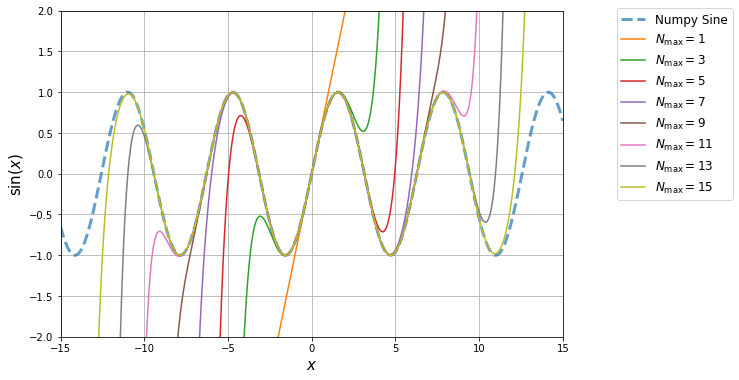

In [62]:
plt.figure(figsize=(9,6))
plt.plot(xs, np.sin(xs), label='Numpy Sine', lw=3, alpha=0.7,ls='--')
for i, sin in list(enumerate(sins))[::2]:
    plt.plot(xs, sin, label=r'$N_{{\mathrm{{max}}}}={}$'.format(nmaxs[i]))
plt.ylim([-2,2])
plt.xlim([np.min(xs),np.max(xs)])
plt.legend(loc=1,bbox_to_anchor=(1.35, 1.025),fontsize=12)
plt.xlabel(r'$x$',fontsize=15)
plt.ylabel(r'$\sin(x)$',fontsize=15)
plt.grid()

We see that, for insufficiently large $N$, the result of the algorithm wanders far outside the valid range of the sine function(-1,1). To make the plot useful we have to limit the value when it's outside the valid range (i.e, impose that the absolute value of the result cannot be larger than 2). 

Also we can notice that, in this case, imposing periodic boundary conditions ($\sin(x+n\pi) = \sin(x)$) will have an effect that is similar, in finite precision, to that of adding more terms in the series. 

Notice that adding more terms increases the range of $x$ in which the series remains fairly accurate. For clarity, we plot just the odd values of $N_\mathrm{max}$.

We need an accuracy estimator to decide how many terms to keep. We can do this by comparing the value of the nth term with the running current total. When that's $<10^{-8}$, iterations can stop. We make a plot of the number of terms, $N$, needed as a function of $x$.

In [63]:
def my_sin(x, abserr=1e-8, maxiter=100):

    # The old value of the sum (previous iteration)
    new_term = x
    old_term = 0.0
    
    # Running total of the sum
    _sum = new_term
    for n in range(2, maxiter + 1):
        # Cache the old term of the series
        old_term = new_term
        # Compute the new term
        new_term = old_term * -x**2 / ((2*n-1) * (2*n-2))
        # Update running total
        _sum += new_term
        # Check if the new addition was less than abserr.
        # If so, we're done.
        if abs(new_term) < abserr:
            return _sum, n
        # Check if we've surpassed the maximum allowed number of 
        # iterations. If so, warn the user and break.
        elif n >= maxiter:
            warnings.warn("Maximum number of iterations reached.", RuntimeWarning)
            return _sum, n

    # if maxiter <= 1
    return _sum, maxiter

In [64]:
xs = np.linspace(0.0, 45.0, 1000)
results = np.array([my_sin(x) for x in xs])

sins = results.T[0]
ns = results.T[1]

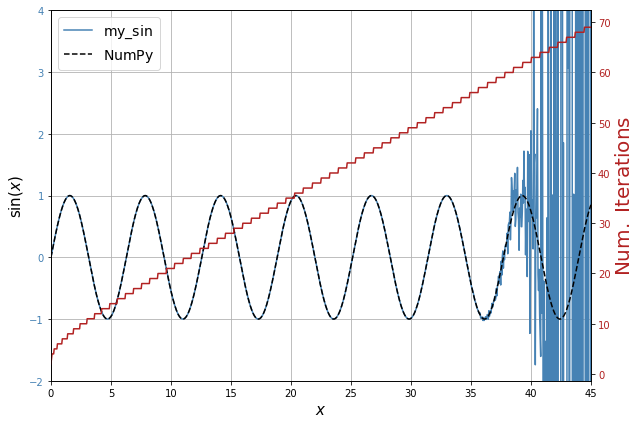

In [65]:
fig, ax1 = plt.subplots(figsize=(9,6))

color = 'steelblue'
ax1.set_xlabel(r'$x$', fontsize=15)
ax1.set_ylabel(r'$\sin(x)$', fontsize=15)
ax1.plot(xs, sins, color=color,label=r'$\mathrm{my\_sin}$')
ax1.plot(xs, np.sin(xs), color='k', ls='--', label=r'$\mathrm{NumPy}$')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([-2,4])
ax1.set_xlim([np.min(xs),np.max(xs)])
ax1.legend(fontsize=14)
ax1.grid()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'firebrick'
ax2.set_ylabel(r'$\mathrm{Num.} \ \mathrm{Iterations}$', color=color, fontsize=20)  # we already handled the x-label with ax1
ax2.plot(xs, ns, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # to avoid labels clipping

We can also look at the accuracy trajectory by showing the error as a function of $N$ for a range of $x$ values. 

In [66]:
xs = [0.1, 3.0, 5.0, 10.0, 20.0]

ns = np.arange(2, 100)
sins = np.array([[my_sin(x, abserr=0.0, maxiter=n)[0] for n in ns] for x in xs])

relerrs = [np.abs((np.sin(x) - sins[i]) / np.sin(x)) for i, x in enumerate(xs)]

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Maximum number of iterations reached.


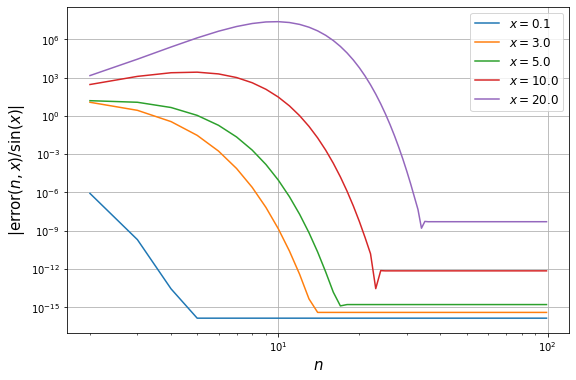

In [68]:
plt.figure(figsize=(9,6))
for i, x in enumerate(xs):
    plt.plot(ns, relerrs[i], label=r'$x={}$'.format(x))
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$n$',fontsize=15)
plt.ylabel(r'$|\mathrm{error}(n, x)/\sin(x)|$',fontsize=15)
plt.legend(loc='best', prop={'size': 12})
plt.grid()

We notice a couple of things: first, as we would expect, the error initially decreases fast with $n$. Second, at some point, the error plateaus. This plateau signals that we are losing precision to something else besides truncation of the series (i.e. finite precision errors), so adding more terms does nothing.

For $x=0.1$ and $x=5$, although the absolute errors are different, the precision plateaus at nearly the same level. For $x=10$, the plateau is beginning to increase, signifying that our secondary source of error is becoming more significant. The level of this plateau continues to increase until it becomes visible on the linear scale in our previous plot around $x=40$.

----------------------------
----------------------------
----
## Errors in Bessel Functions


For purposes of comparison, let's import the `scipy` version of the spherical Bessel function.

In [69]:
from scipy.special import spherical_jn

### Part 1

In [70]:
def compute_jn_upwards(n, x):
    j0 = np.sin(x) / x
    j1 = (j0 - np.cos(x)) / x
    
    if n < 0:
        raise ValueError('Invalid `n` = {} passed to `compute_jn_upwards`. n must be > 0'.format(n))
    elif n == 0:
        return j0
    elif n == 1:
        return j1
    else:
        jnm1 = j0
        jn = j1
        jnp1 = 0
        for i in range(1, n):
            jnp1 = (2 * i + 1) / x * jn - jnm1
            jnm1 = jn
            jn = jnp1
        return jnp1

In [71]:
# Test
print(compute_jn_upwards(5, 1.0))
print(spherical_jn(5, 1.0))

9.256115857025904e-05
9.256115861125825e-05


In [72]:
def compute_jn_downwards(n, x, nstart=None):
    xx = np.array(x) if hasattr(x, '__len__') else np.array([x])
    if n < 0:
        raise ValueError('Invalid `n` = {} passed to `compute_jn_upwards`. n must be > 0'.format(n))
    elif n == 0:
        return np.sin(x) / xx
    elif n == 1:
        return (np.sin(x) / xx - np.cos(x)) / xx
    
    if nstart is None:
        nstart = n + 10
    
    js = np.zeros((nstart,len(xx)), dtype=np.float64)
    js[-1] = 1.0
    js[-2] = 1.0
    for i in range(nstart-2, 0, -1):
        js[i-1] = (2 * i + 1) / xx * js[i] - js[i+1]
    scaling = np.sin(xx) / xx / js[0]
    return js[n] * scaling

In [73]:
# Test
print(compute_jn_downwards(5, 1.0))
print(spherical_jn(5, 1.0))

[9.25611586e-05]
9.256115861125825e-05


In [74]:
xs = np.array([0.1, 1.0, 10.0])
ns = np.arange(0, 26)
jndowns = np.array([compute_jn_downwards(n, xs) for n in ns])
jnups = np.array([compute_jn_upwards(n, xs) for n in ns])

In [75]:
print("\n Upwards")
line = "\t\t\t".join(["x = %.1f" % x for x in xs])
print(line)
print('=' * 65)
# The `join` call above joins strings together with "\t\t\t" between them.
for n, jns in enumerate(jnups):
    line = ['j_{:d} = {:.4e}'.format(n, jns[i]) for i in range(len(xs))]
    print('\t'.join(line))

print()
print("\n \n Downwards")
line = "\t\t\t".join(["x = %.1f" % x for x in xs])
print(line)
print('=' * 65)
for n, jns in enumerate(jndowns):
    line = ['j_{:d} = {:.4e}'.format(n, jns[i]) for i in range(len(xs))]
    print('\t'.join(line))


 Upwards
x = 0.1			x = 1.0			x = 10.0
j_0 = 9.9833e-01	j_0 = 8.4147e-01	j_0 = -5.4402e-02
j_1 = 3.3300e-02	j_1 = 3.0117e-01	j_1 = 7.8467e-02
j_2 = 6.6619e-04	j_2 = 6.2035e-02	j_2 = 7.7942e-02
j_3 = 9.5185e-06	j_3 = 9.0066e-03	j_3 = -3.9496e-02
j_4 = 1.0574e-07	j_4 = 1.0110e-03	j_4 = -1.0559e-01
j_5 = -1.8810e-09	j_5 = 9.2561e-05	j_5 = -5.5535e-02
j_6 = -3.1266e-07	j_6 = 7.1569e-06	j_6 = 4.4501e-02
j_7 = -4.0643e-05	j_7 = 4.7901e-07	j_7 = 1.1339e-01
j_8 = -6.0962e-03	j_8 = 2.8179e-08	j_8 = 1.2558e-01
j_9 = -1.0363e+00	j_9 = 3.5501e-11	j_9 = 1.0010e-01
j_10 = -1.9689e+02	j_10 = -2.7504e-08	j_10 = 6.4605e-02
j_11 = -4.1346e+04	j_11 = -5.7763e-07	j_11 = 3.5574e-02
j_12 = -9.5095e+06	j_12 = -1.3258e-05	j_12 = 1.7216e-02
j_13 = -2.3773e+09	j_13 = -3.3087e-04	j_13 = 7.4656e-03
j_14 = -6.4187e+11	j_14 = -8.9203e-03	j_14 = 2.9411e-03
j_15 = -1.8614e+14	j_15 = -2.5836e-01	j_15 = 1.0635e-03
j_16 = -5.7703e+16	j_16 = -8.0002e+00	j_16 = 3.5590e-04
j_17 = -1.9042e+19	j_17 = -2.6375e+02	j_17 = 1.109

### Parts 2 and 3

In [76]:
def compute_jn(n, x, abserr=1e-10, maxn = 1000):
    nstart = n + 10
    converged = False
    
    new = compute_jn_downwards(n, x, nstart=nstart)
    for m in range(nstart + 1, maxn + 1):
        old = new
        new = compute_jn_downwards(n, x, nstart=m)
        
        if abs(new - old) < abserr:
            return new, m
    # If we get here, we exceeded maxn
    warnings.warn("`maxn` iteration exceeded in compute_jn.")
    return new, m

In [77]:
xs = np.linspace(1e-3, 40, 100)
jns = np.array([compute_jn(10, x) for x in xs])

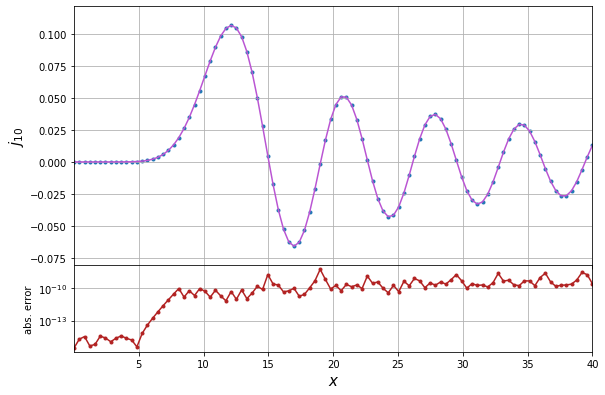

In [79]:
xs = np.linspace(1e-3, 40, 100)
jns = np.array([compute_jn(10, x) for x in xs])

fig = plt.figure(figsize=(9,6))
frame1=fig.add_axes((.1,.3,.8,.6))
plt.scatter(xs, jns.T[0], label='modified downwards', marker='.')
plt.plot(xs, spherical_jn(10, xs), label='SciPy', color='mediumorchid')
plt.xlim([np.min(xs),np.max(xs)])
frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.grid()
plt.ylabel(r'$j_{10}$',fontsize=15)

relerrs = np.abs((jns.T[0] - spherical_jn(10, xs)) / spherical_jn(10, xs))
frame2=fig.add_axes((.1,.1,.8,.2))        
plt.plot(xs,relerrs,marker='.',color='firebrick')
plt.grid()
plt.xlim([np.min(xs),np.max(xs)])
plt.yscale('log')
plt.ylabel('abs. error')
dd=plt.xlabel(r'$x$', fontsize=15)

#plt.grid()
#plt.legend()

### Part 4

In [80]:
xs = np.linspace(0.1, 15, 1000)
ls = np.arange(1, 8)
jus = np.array([[compute_jn_upwards(ell, x) for x in xs] for ell in ls])
jds = np.array([[compute_jn_downwards(ell, x, nstart=ell + 20)[0] for x in xs] for ell in ls])

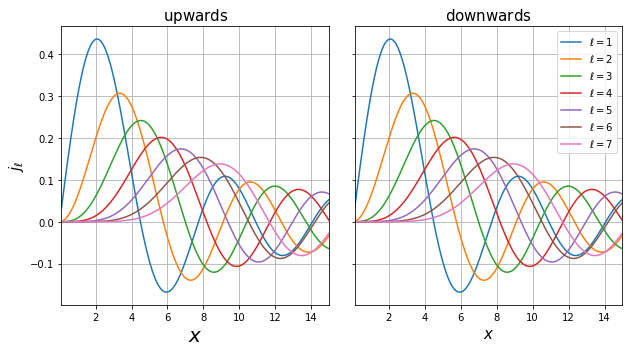

In [81]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True,sharey=True, figsize=(9,5))

for ju in jus:
    ax1.plot(xs, ju)
ax1.set_ylabel(r'$j_{\ell}$', fontsize=15)
ax1.set_xlabel(r'$x$', fontsize=20)
ax1.set_title(r'$\mathrm{upwards}$',fontsize=15)
ax1.set_xlim([np.min(xs), np.max(xs)])

for ell, jd in enumerate(jds):
    ax2.plot(xs, jd,label=r'$\ell = {}$'.format(ell+1))
ax2.set_title(r'$\mathrm{downwards}$',fontsize=15)
ax2.set_xlabel(r'$x$', fontsize=15)
ax2.legend()
    
fig.tight_layout()
ax1.grid()
ax2.grid()

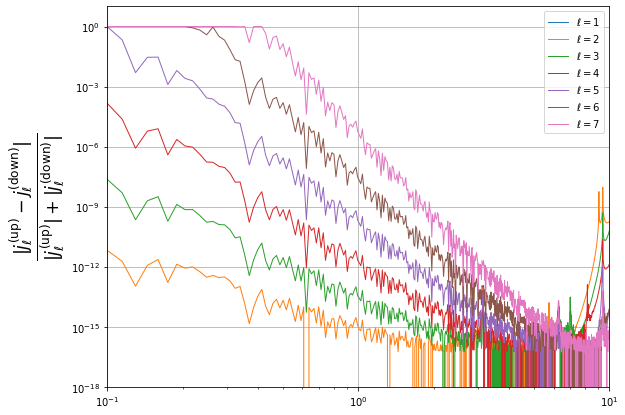

In [82]:
plt.figure(figsize=(9,7))

for ell, (ju, jd) in enumerate(zip(jus, jds)):
    plt.plot(xs, np.abs(ju - jd) / (np.abs(ju) + np.abs(jd)), label=r'$\ell = {}$'.format(ell+1), lw=1)
plt.ylabel(r'$\frac{\left|j_{\ell}^{\mathrm{(up)}}-j_{\ell}^{\mathrm{(down)}}\right|}{\left|j_{\ell}^{\mathrm{(up)}}\right|+\left|j_{\ell}^{\mathrm{(down)}}\right|}$',fontsize=25)
plt.xlim([np.min(xs), 10])
plt.ylim(10.**-18,10.)
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid()

In this implementation, the $l=1$ calculation is exact and the difference is zero.